In [1]:
import sys
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from skimage.color import lab2rgb

In [2]:
# representative RGB colours for each label, for nice display
COLOUR_RGB = {
    'red': (255, 0, 0),
    'orange': (255, 114, 0),
    'yellow': (255, 255, 0),
    'green': (0, 230, 0),
    'blue': (0, 0, 255),
    'purple': (187, 0, 187),
    'brown': (117, 60, 0),
    'pink': (255, 187, 187),
    'black': (0, 0, 0),
    'grey': (150, 150, 150),
    'white': (255, 255, 255),
}
name_to_rgb = np.vectorize(COLOUR_RGB.get, otypes=[np.uint8, np.uint8, np.uint8])

In [3]:
def plot_predictions(model, lum=71, resolution=256):
    """
    Create a slice of LAB colour space with given luminance; predict with the model; plot the results.
    """
    wid = resolution
    hei = resolution
    n_ticks = 5

    # create a hei*wid grid of LAB colour values, with L=lum
    ag = np.linspace(-100, 100, wid)
    bg = np.linspace(-100, 100, hei)
    aa, bb = np.meshgrid(ag, bg)
    ll = lum * np.ones((hei, wid))
    lab_grid = np.stack([ll, aa, bb], axis=2)

    # convert to RGB for consistency with original input
    X_grid = lab2rgb(lab_grid)

    # predict and convert predictions to colours so we can see what's happening
    y_grid = model.predict(X_grid.reshape((wid*hei, 3)))
    pixels = np.stack(name_to_rgb(y_grid), axis=1) / 255
    pixels = pixels.reshape((hei, wid, 3))

    # plot input and predictions
    plt.figure(figsize=(10, 5))
    plt.suptitle('Predictions at L=%g' % (lum,))
    plt.subplot(1, 2, 1)
    plt.title('Inputs')
    plt.xticks(np.linspace(0, wid, n_ticks), np.linspace(-100, 100, n_ticks))
    plt.yticks(np.linspace(0, hei, n_ticks), np.linspace(-100, 100, n_ticks))
    plt.xlabel('A')
    plt.ylabel('B')
    plt.imshow(X_grid.reshape((hei, wid, 3)))

    plt.subplot(1, 2, 2)
    plt.title('Predicted Labels')
    plt.xticks(np.linspace(0, wid, n_ticks), np.linspace(-100, 100, n_ticks))
    plt.yticks(np.linspace(0, hei, n_ticks), np.linspace(-100, 100, n_ticks))
    plt.xlabel('A')
    plt.imshow(pixels)

In [4]:
# df = pd.read_csv('colour-data.csv')
# print(df)

In [5]:
#I had to reseach how to take out multiple column from a dataframe
#https://stackoverflow.com/questions/11285613/selecting-multiple-columns-in-a-pandas-dataframe
# dfx = df[['R','G','B']]
# print(dfx)

In [6]:
#I learned how to convert and understand that why df.values does not work anymore and we need to use df.to_numpy()
#https://stackoverflow.com/questions/13187778/convert-pandas-dataframe-to-numpy-array
# X = dfx.to_numpy()
# print(X)
# X = X/255
# print(X)

In [7]:
# dfy = df['Label']
# print(dfy)
# y = dfy.to_numpy()
# print(y)

In [8]:
from sklearn.model_selection import train_test_split
#X_test and y_test is equal to X_valid and y_valid  
# X_train, X_test, y_train, y_test = train_test_split( 
#     X, y, test_size=0.25, train_size=0.75)

# print(X_train)
# print('----------')
# print(X_test)
# print('----------')
# print(y_train)
# print('----------')
# print(y_test)

In [9]:
from sklearn.naive_bayes import GaussianNB
# model_rgb = GaussianNB()
# model_rgb.fit(X_train, y_train)
# print(model_rgb.theta_)  # sample means
# print(model_rgb.sigma_)  # sample variances

# y_predicted = model_rgb.predict(X_test)
# print(model_rgb.score(X_train, y_train))
# print(model_rgb.score(X_test, y_test))
# print(y_predicted)

In [10]:
from skimage.color import rgb2lab
def convertor(X):
    X_reshape = X.reshape(1,-1,3)
    convert_to_lab = rgb2lab(X_reshape) #provided website around middle 'skimage.color.rgb2lab'
    reshape_back = convert_to_lab.reshape(-1,3)
    return reshape_back
# A = convertor(X)
# print(A)

In [11]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer
# model_lab = make_pipeline(
#     FunctionTransformer(convertor),
#     GaussianNB()   
# )

Accuracy score for validation data of model_rgb:
0.5455465587044535
Accuracy score for validation data of model_lab:
0.6336032388663968


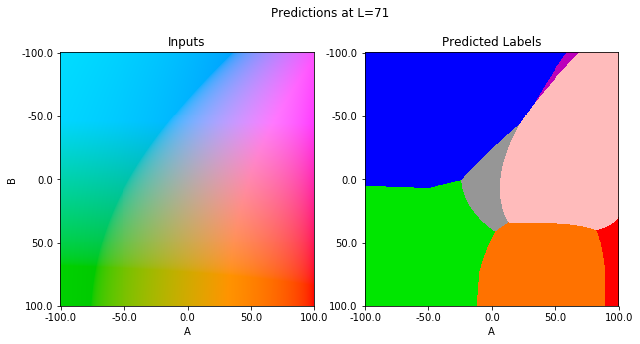

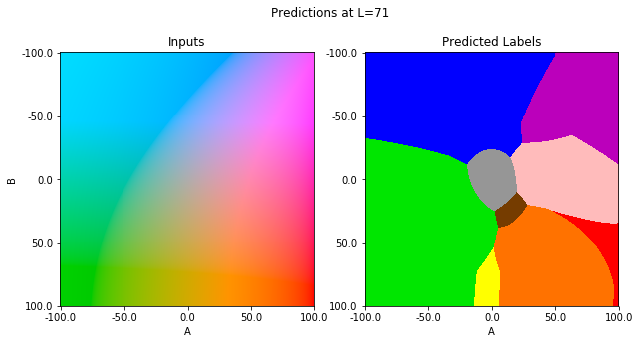

In [12]:
def main(infile):
    data = pd.read_csv(infile)
    dfx = data[['R','G','B']]
    dfx = dfx.to_numpy()
    X = dfx/255 # array with shape (n, 3). Divide by 255 so components are all 0-1.
    #print(X)
    
    dfy = data['Label']
    y = dfy.to_numpy() # array with shape (n,) of colour words.
    #print(y)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, train_size=0.75)

    # TODO: build model_rgb to predict y from X.
    model_rgb = GaussianNB()
    model_rgb.fit(X_train, y_train)
    y_predicted = model_rgb.predict(X_test)

    # TODO: print model_rgb's accuracy score
#     print('Accuracy score for train:')
#     print(model_rgb.score(X_train, y_train))
    print('Accuracy score for validation data of model_rgb:') #X_test(website) is X_valid(lecture)
    print(model_rgb.score(X_test, y_test))
    
    model_lab = make_pipeline(
    #FunctionTransformer(convertor),
        
        #Before it keeps giving me warning of 
        # FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
          #"validate=False in 0.22.", FutureWarning)
        #I recived help from a friend saying setting my validate=True will reslove this probelm
        #I still kept the original one above commeted below model_lab=make_pipeline
    FunctionTransformer(convertor, validate=True),
    GaussianNB()
    )
    
    # TODO: build model_lab to predict y from X by converting to LAB colour first.
    model_lab.fit(X_train, y_train)
    y_predicted = model_lab.predict(X_test)
    
    
    # TODO: print model_lab's accuracy score
    print('Accuracy score for validation data of model_lab:') #X_test(website) is X_valid(lecture)
    print(model_lab.score(X_test, y_test))


    plot_predictions(model_rgb)
    plt.savefig('predictions_rgb.png')
    plot_predictions(model_lab)
    plt.savefig('predictions_lab.png')
     
              
if __name__ == '__main__':
    #main(sys.argv[1])
    main('colour-data.csv')